In [1]:
import pandas as pd
data = pd.read_csv('202012_202012_주민등록인구및세대현황_연간.csv', encoding='cp949')
data.head()

,행정구역,2020년_거주자 인구수,2020년_세대수,2020년_세대당 인구,2020년_남자 인구수,2020년_여자 인구수,2020년_남여 비율
0,서울특별시 (1100000000),"9,505,868","4,294,290",2.21,"4,623,790","4,882,078",0.95
1,서울특별시 종로구 (1111000000),"144,017","70,734",2.04,"70,140","73,877",0.95
2,서울특별시 종로구 청운효자동(1111051500),"12,057","5,098",2.37,"5,628","6,429",0.88
3,서울특별시 종로구 사직동(1111053000),"9,080","4,431",2.05,"4,085","4,995",0.82
4,서울특별시 종로구 삼청동(1111054000),"2,492","1,220",2.04,"1,211","1,281",0.95


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3846 entries, 0 to 3845
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   행정구역           3846 non-null   object 
 1   2020년_거주자 인구수  3846 non-null   object 
 2   2020년_세대수      3846 non-null   object 
 3   2020년_세대당 인구   3846 non-null   float64
 4   2020년_남자 인구수   3846 non-null   object 
 5   2020년_여자 인구수   3846 non-null   object 
 6   2020년_남여 비율    3846 non-null   float64
dtypes: float64(2), object(5)
memory usage: 210.5+ KB


In [3]:
data.rename(columns={'2020년_거주자 인구수':'총인구수','2020년_세대수':'세대수','2020년_세대당 인구':'세대당 인구','2020년_여자 인구수':'여자','2020년_남자 인구수':'남자','2020년_남여 비율':'남녀비율'}, inplace=True)

In [4]:
# 다른 방식
data.columns=['행정구역', '총인구수', '세대수', '세대당 인구', '남자', '여자', '남녀비율']
data.columns

Index(['행정구역', '총인구수', '세대수', '세대당 인구', '남자', '여자', '남녀비율'], dtype='object')

In [5]:
data.drop(axis=1,columns='남녀비율',inplace=True)

In [6]:
data

,행정구역,총인구수,세대수,세대당 인구,남자,여자
0,서울특별시 (1100000000),"9,505,868","4,294,290",2.21,"4,623,790","4,882,078"
1,서울특별시 종로구 (1111000000),"144,017","70,734",2.04,"70,140","73,877"
2,서울특별시 종로구 청운효자동(1111051500),"12,057","5,098",2.37,"5,628","6,429"
3,서울특별시 종로구 사직동(1111053000),"9,080","4,431",2.05,"4,085","4,995"
4,서울특별시 종로구 삼청동(1111054000),"2,492","1,220",2.04,"1,211","1,281"
...,...,...,...,...,...,...
3841,제주특별자치도 서귀포시 서홍동(5013058000),"10,572","4,321",2.45,"5,227","5,345"
3842,제주특별자치도 서귀포시 대륜동(5013059000),"14,651","6,402",2.29,"7,403","7,248"
3843,제주특별자치도 서귀포시 대천동(5013060000),"13,851","6,328",2.19,"7,064","6,787"
3844,제주특별자치도 서귀포시 중문동(5013061000),"11,522","5,473",2.11,"5,938","5,584"


In [7]:
data.행정구역 = data.행정구역.str.split('(').str.get(0)
data['시']=data.행정구역.str.split().str.get(0)
data['구']=data.행정구역.str.split().str.get(1)
data['동']=data.행정구역.str.split().str.get(2)

data.sample(2)

,행정구역,총인구수,세대수,세대당 인구,남자,여자,시,구,동
2753,전라남도 목포시 원산동,"13,137","5,952",2.21,"6,472","6,665",전라남도,목포시,원산동
2327,충청남도 아산시,"314,161","137,919",2.28,"163,051","151,110",충청남도,아산시,NaN


In [8]:
busan = data[data['시']=='부산광역시']
busan

,행정구역,총인구수,세대수,세대당 인구,남자,여자,시,구,동
451,부산광역시,"3,356,587","1,500,271",2.24,"1,644,092","1,712,495",부산광역시,NaN,NaN
452,부산광역시 중구,"40,273","22,791",1.77,"19,716","20,557",부산광역시,중구,NaN
453,부산광역시 중구 중앙동,"2,400","1,690",1.42,"1,166","1,234",부산광역시,중구,중앙동
454,부산광역시 중구 동광동,"2,734","1,742",1.57,"1,381","1,353",부산광역시,중구,동광동
455,부산광역시 중구 대청동,"6,382","3,436",1.86,"3,013","3,369",부산광역시,중구,대청동
...,...,...,...,...,...,...,...,...,...
668,부산광역시 기장군 기장읍,"52,855","24,992",2.11,"25,788","27,067",부산광역시,기장군,기장읍
669,부산광역시 기장군 장안읍,"8,528","4,565",1.87,"4,554","3,974",부산광역시,기장군,장안읍
670,부산광역시 기장군 정관읍,"81,861","31,085",2.63,"40,432","41,429",부산광역시,기장군,정관읍
671,부산광역시 기장군 일광면,"22,430","9,470",2.37,"11,184","11,246",부산광역시,기장군,일광면


In [9]:
busan.reset_index(drop=True,inplace=True)
busan.sample(2)

,행정구역,총인구수,세대수,세대당 인구,남자,여자,시,구,동
40,부산광역시 영도구 영선제1동,"4,079","1,856",2.20,"1,983","2,096",부산광역시,영도구,영선제1동
46,부산광역시 영도구 청학제2동,"18,209","7,863",2.32,"9,052","9,157",부산광역시,영도구,청학제2동


In [10]:
busan.총인구수 = busan.총인구수.str.replace(',','').astype('int')
busan.남자 = busan.남자.str.replace(',','').astype('int')
busan.여자 = busan.여자.str.replace(',','').astype('int')

busan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222 entries, 0 to 221
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   행정구역    222 non-null    object 
 1   총인구수    222 non-null    int32  
 2   세대수     222 non-null    object 
 3   세대당 인구  222 non-null    float64
 4   남자      222 non-null    int32  
 5   여자      222 non-null    int32  
 6   시       222 non-null    object 
 7   구       221 non-null    object 
 8   동       205 non-null    object 
dtypes: float64(1), int32(3), object(5)
memory usage: 13.1+ KB


C:\Users\PKNU\anaconda3\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [11]:
busan

,행정구역,총인구수,세대수,세대당 인구,남자,여자,시,구,동
0,부산광역시,3356587,"1,500,271",2.24,1644092,1712495,부산광역시,NaN,NaN
1,부산광역시 중구,40273,"22,791",1.77,19716,20557,부산광역시,중구,NaN
2,부산광역시 중구 중앙동,2400,"1,690",1.42,1166,1234,부산광역시,중구,중앙동
3,부산광역시 중구 동광동,2734,"1,742",1.57,1381,1353,부산광역시,중구,동광동
4,부산광역시 중구 대청동,6382,"3,436",1.86,3013,3369,부산광역시,중구,대청동
...,...,...,...,...,...,...,...,...,...
217,부산광역시 기장군 기장읍,52855,"24,992",2.11,25788,27067,부산광역시,기장군,기장읍
218,부산광역시 기장군 장안읍,8528,"4,565",1.87,4554,3974,부산광역시,기장군,장안읍
219,부산광역시 기장군 정관읍,81861,"31,085",2.63,40432,41429,부산광역시,기장군,정관읍
220,부산광역시 기장군 일광면,22430,"9,470",2.37,11184,11246,부산광역시,기장군,일광면


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
# matplotlib 기반

In [13]:
busan.dropna(inplace=True)  #안에 NaN값 있는거 삭제
busan

<ipython-input-13-8180a5af79bd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  busan.dropna(inplace=True)  #안에 NaN값 있는거 삭제


,행정구역,총인구수,세대수,세대당 인구,남자,여자,시,구,동
2,부산광역시 중구 중앙동,2400,"1,690",1.42,1166,1234,부산광역시,중구,중앙동
3,부산광역시 중구 동광동,2734,"1,742",1.57,1381,1353,부산광역시,중구,동광동
4,부산광역시 중구 대청동,6382,"3,436",1.86,3013,3369,부산광역시,중구,대청동
5,부산광역시 중구 보수동,10529,"5,729",1.84,5116,5413,부산광역시,중구,보수동
6,부산광역시 중구 부평동,4393,"2,578",1.70,2081,2312,부산광역시,중구,부평동
...,...,...,...,...,...,...,...,...,...
217,부산광역시 기장군 기장읍,52855,"24,992",2.11,25788,27067,부산광역시,기장군,기장읍
218,부산광역시 기장군 장안읍,8528,"4,565",1.87,4554,3974,부산광역시,기장군,장안읍
219,부산광역시 기장군 정관읍,81861,"31,085",2.63,40432,41429,부산광역시,기장군,정관읍
220,부산광역시 기장군 일광면,22430,"9,470",2.37,11184,11246,부산광역시,기장군,일광면


In [14]:
busan_t = busan.groupby('구')['총인구수'].sum().sort_values(ascending=True)
busan_t

구
중구       40273
동구       87206
서구      105937
영도구     111391
강서구     137129
기장군     173721
수영구     175032
연제구     207134
사상구     210618
금정구     230372
남구      265073
동래구     268165
북구      282133
사하구     308965
부산진구    355285
해운대구    398153
Name: 총인구수, dtype: int32

In [15]:
busan_t = busan_t.reset_index()
busan_t

,구,총인구수
0,중구,40273
1,동구,87206
2,서구,105937
3,영도구,111391
4,강서구,137129
5,기장군,173721
6,수영구,175032
7,연제구,207134
8,사상구,210618
9,금정구,230372


In [16]:
import matplotlib as mat
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import warnings
warnings.filterwarnings('ignore')
mat.rcParams['font.family'] = 'NanumGothic'
print('버전 :',mat.__version__)
print('설치위치 :',mat.__file__)
print('설정 :',mat.get_configdir())
print('캐시 :',mat.get_cachedir())
fm._rebuild()

버전 : 3.3.4
설치위치 : C:\Users\PKNU\anaconda3\lib\site-packages\matplotlib\__init__.py
설정 : C:\Users\PKNU\.matplotlib
캐시 : C:\Users\PKNU\.matplotlib


<AxesSubplot:xlabel='구', ylabel='총인구수'>

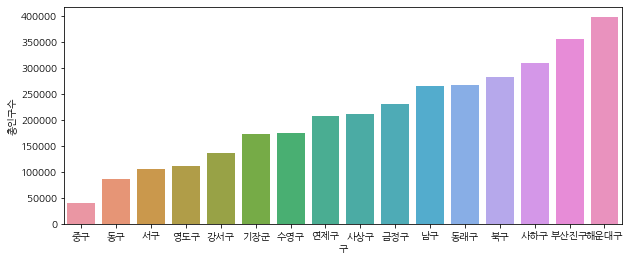

In [17]:
plt.figure(figsize=(10,4))
sns.barplot(data=busan_t,x='구',y='총인구수',ci=None)

In [18]:
busan_top10 = busan.sort_values(by=['총인구수'], ascending=False).head(10)
busan_top10

,행정구역,총인구수,세대수,세대당 인구,남자,여자,시,구,동
219,부산광역시 기장군 정관읍,81861,"31,085",2.63,40432,41429,부산광역시,기장군,정관읍
217,부산광역시 기장군 기장읍,52855,"24,992",2.11,25788,27067,부산광역시,기장군,기장읍
174,부산광역시 강서구 명지1동,50207,"18,717",2.68,25171,25036,부산광역시,강서구,명지1동
91,부산광역시 남구 용호제1동,44771,"16,941",2.64,21573,23198,부산광역시,남구,용호제1동
108,부산광역시 북구 화명제1동,42454,"14,421",2.94,20914,21540,부산광역시,북구,화명제1동
148,부산광역시 사하구 다대제1동,39643,"16,758",2.37,19918,19725,부산광역시,사하구,다대제1동
77,부산광역시 동래구 온천제3동,38884,"17,089",2.28,19040,19844,부산광역시,동래구,온천제3동
107,부산광역시 북구 금곡동,38805,"18,011",2.15,18805,20000,부산광역시,북구,금곡동
134,부산광역시 해운대구 재송제1동,38203,"14,469",2.64,18856,19347,부산광역시,해운대구,재송제1동
191,부산광역시 연제구 연산제9동,35872,"14,531",2.47,17203,18669,부산광역시,연제구,연산제9동


<AxesSubplot:xlabel='동', ylabel='총인구수'>

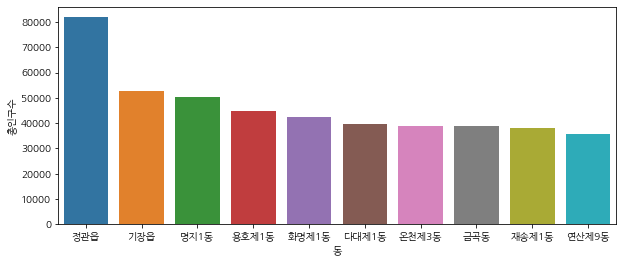

In [19]:
plt.figure(figsize=(10,4))
sns.barplot(data=busan_top10,x='동',y='총인구수',ci=None)

<AxesSubplot:xlabel='여자', ylabel='동'>

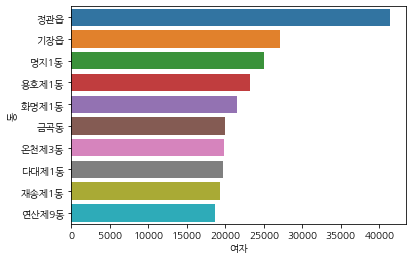

In [20]:
busan_top10 = busan.sort_values(by=['여자'],ascending=False).head(10)
sns.barplot(data=busan_top10,x='여자',y='동',ci=None)

<AxesSubplot:xlabel='남자', ylabel='동'>

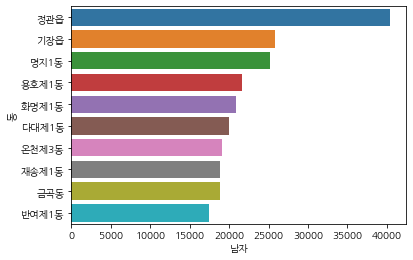

In [21]:
busan_top10 = busan.sort_values(by=['남자'],ascending=False).head(10)
sns.barplot(data=busan_top10,x='남자',y='동',ci=None)

<AxesSubplot:xlabel='구', ylabel='여자'>

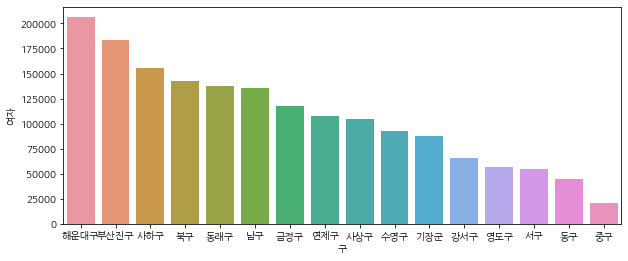

In [22]:
busan_t = busan.groupby('구')['여자'].sum().sort_values(ascending=False)
busan_t = busan_t.reset_index()
plt.figure(figsize=(10,4))
sns.barplot(data=busan_t,x='구',y='여자',ci=None)

<AxesSubplot:xlabel='구', ylabel='남자'>

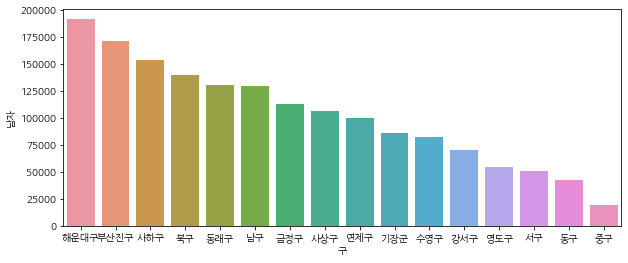

In [23]:
busan_t = busan.groupby('구')['남자'].sum().sort_values(ascending=False)
busan_t = busan_t.reset_index()
plt.figure(figsize=(10,4))
sns.barplot(data=busan_t,x='구',y='남자',ci=None)

In [24]:
busan.head()

,행정구역,총인구수,세대수,세대당 인구,남자,여자,시,구,동
2,부산광역시 중구 중앙동,2400,"1,690",1.42,1166,1234,부산광역시,중구,중앙동
3,부산광역시 중구 동광동,2734,"1,742",1.57,1381,1353,부산광역시,중구,동광동
4,부산광역시 중구 대청동,6382,"3,436",1.86,3013,3369,부산광역시,중구,대청동
5,부산광역시 중구 보수동,10529,"5,729",1.84,5116,5413,부산광역시,중구,보수동
6,부산광역시 중구 부평동,4393,"2,578",1.70,2081,2312,부산광역시,중구,부평동


In [27]:
import json

rfile = open('HangJeongDong_ver20210401.geojson', 'r', encoding='utf-8').read()
jsonData = json.loads(rfile)

jsonData_jeju = {"type": "FeatureCollection"}
jsonData_pick_list = []
jsonData_dong=[]

for idx in jsonData["features"]:
    if idx["properties"]["sidonm"]=='부산광역시': #지역명
        dong = idx["properties"]["adm_nm"].split()[-1].strip()
        if dong == '가야제1동':
            dong = '가야1동'
        idx['id']=dong # 동이름
        jsonData_dong.append(dong)
        jsonData_pick_list.append(idx)

jsonData["features"] = jsonData_pick_list
f=open('busan.json','w',encoding='utf-8')
json.dump(jsonData,f)

In [28]:
import folium,json

map_osm = folium.Map(location=[35.230194, 129.074721],zoom_start=10)

rfile = open('busan.json', 'r', encoding='utf-8').read()
jsonData = json.loads(rfile)

folium.Choropleth(geo_data=jsonData, 
               data=busan, 
               columns=['동','총인구수'], 
               key_on='feature.id',
               fill_color='YlGn', 
               fill_opacity =0.7,
               line_opacity = 0.3,
               legend_name='부산 인구').add_to(map_osm)
map_osm

In [29]:
df_dong = sorted(busan['동'])
len(df_dong)

205

In [30]:
json_dong = sorted(jsonData_dong)
len(json_dong)

205

In [31]:
for i,item in enumerate(zip(df_dong,json_dong)):
    print(i,'  ',item)

0    ('가덕도동', '가덕도동')
1    ('가락동', '가락동')
2    ('가야제1동', '가야1동')
3    ('가야제2동', '가야2동')
4    ('감만제1동', '감만1동')
5    ('감만제2동', '감만2동')
6    ('감전동', '감전동')
7    ('감천제1동', '감천1동')
8    ('감천제2동', '감천2동')
9    ('강동동', '강동동')
10    ('개금제1동', '개금1동')
11    ('개금제2동', '개금2동')
12    ('개금제3동', '개금3동')
13    ('거제제1동', '거제1동')
14    ('거제제2동', '거제2동')
15    ('거제제3동', '거제3동')
16    ('거제제4동', '거제4동')
17    ('광복동', '광복동')
18    ('광안제1동', '광안1동')
19    ('광안제2동', '광안2동')
20    ('광안제3동', '광안3동')
21    ('광안제4동', '광안4동')
22    ('괘법동', '괘법동')
23    ('괴정제1동', '괴정1동')
24    ('괴정제2동', '괴정2동')
25    ('괴정제3동', '괴정3동')
26    ('괴정제4동', '괴정4동')
27    ('구서제1동', '구서1동')
28    ('구서제2동', '구서2동')
29    ('구평동', '구평동')
30    ('구포제1동', '구포1동')
31    ('구포제2동', '구포2동')
32    ('구포제3동', '구포3동')
33    ('금곡동', '금곡동')
34    ('금사회동동', '금사회동동')
35    ('금성동', '금성동')
36    ('기장읍', '기장읍')
37    ('남부민제1동', '남부민1동')
38    ('남부민제2동', '남부민2동')
39    ('남산동', '남산동')
40    ('남천제1동', '남천1동')
41    ('남천제2동', '남천2동')
42    ('남포동', '남포동')
43    (

In [32]:
busan['동']=busan['동'].str.replace('제','')

In [33]:
busan

,행정구역,총인구수,세대수,세대당 인구,남자,여자,시,구,동
2,부산광역시 중구 중앙동,2400,"1,690",1.42,1166,1234,부산광역시,중구,중앙동
3,부산광역시 중구 동광동,2734,"1,742",1.57,1381,1353,부산광역시,중구,동광동
4,부산광역시 중구 대청동,6382,"3,436",1.86,3013,3369,부산광역시,중구,대청동
5,부산광역시 중구 보수동,10529,"5,729",1.84,5116,5413,부산광역시,중구,보수동
6,부산광역시 중구 부평동,4393,"2,578",1.70,2081,2312,부산광역시,중구,부평동
...,...,...,...,...,...,...,...,...,...
217,부산광역시 기장군 기장읍,52855,"24,992",2.11,25788,27067,부산광역시,기장군,기장읍
218,부산광역시 기장군 장안읍,8528,"4,565",1.87,4554,3974,부산광역시,기장군,장안읍
219,부산광역시 기장군 정관읍,81861,"31,085",2.63,40432,41429,부산광역시,기장군,정관읍
220,부산광역시 기장군 일광면,22430,"9,470",2.37,11184,11246,부산광역시,기장군,일광면


In [34]:
import folium,json

map_osm = folium.Map(location=[35.230194, 129.074721],zoom_start=10)

rfile = open('busan.json', 'r', encoding='utf-8').read()
jsonData = json.loads(rfile)

folium.Choropleth(geo_data=jsonData, 
               data=busan, 
               columns=['동','총인구수'], 
               key_on='feature.id',
               fill_color='YlGn', 
               fill_opacity =0.7,
               line_opacity = 0.3,
               legend_name='부산 인구').add_to(map_osm)
map_osm

In [35]:
busan['동']=busan['동'].str.replace('거1동','거제1동')
busan['동']=busan['동'].str.replace('거2동','거제2동')
busan['동']=busan['동'].str.replace('거3동','거제3동')
busan['동']=busan['동'].str.replace('거4동','거제4동')

In [42]:
import folium,json

map_osm = folium.Map(location=[35.230194, 129.074721],zoom_start=12)

rfile = open('busan.json', 'r', encoding='utf-8').read()
jsonData = json.loads(rfile)

folium.Choropleth(geo_data=jsonData, 
               data=busan, 
               columns=['동','총인구수'], 
               key_on='feature.id',
               fill_color='YlGn', 
               fill_opacity =0.5,
               line_opacity = 0.3,
               legend_name='부산 인구').add_to(map_osm)
map_osm